In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('data/umfrage_auto.csv', header=None)
data.head()

,0,1,2,3
0,9,3,6,5
1,3,6,3,1
2,1,1,2,8
3,2,5,4,4
4,3,3,5,5


In [9]:
row_margin = data.sum(axis=1)
col_margin = data.sum(axis=0)
col_margin

0    18
1    18
2    20
3    23
dtype: int64

In [47]:
e = np.dot(np.matrix(row_margin.values).T, np.matrix(col_margin.values)) / data.values.sum()**2
e

matrix([[0.06633552, 0.06633552, 0.07370614, 0.08476206],
        [0.03749399, 0.03749399, 0.04165999, 0.04790899],
        [0.03460984, 0.03460984, 0.03845538, 0.04422368],
        [0.0432623 , 0.0432623 , 0.04806922, 0.0552796 ],
        [0.04614645, 0.04614645, 0.05127383, 0.05896491]])

In [48]:
p = data.values / data.values.sum()
z = (p - e) / np.sqrt(e)
z

matrix([[ 0.18476903, -0.11011488,  0.0082627 , -0.07374794],
        [ 0.00248248,  0.19859862, -0.01805569, -0.16104973],
        [-0.11799581, -0.11799581, -0.06700098,  0.27124914],
        [-0.08627978,  0.0962944 ,  0.01169317, -0.01976339],
        [-0.03804055, -0.03804055,  0.05307123,  0.0178161 ]])

In [49]:
u, s, vh = np.linalg.svd(z, full_matrices=False)
np.matmul(u, np.matmul(np.diag(s), vh))

matrix([[ 0.18476903, -0.11011488,  0.0082627 , -0.07374794],
        [ 0.00248248,  0.19859862, -0.01805569, -0.16104973],
        [-0.11799581, -0.11799581, -0.06700098,  0.27124914],
        [-0.08627978,  0.0962944 ,  0.01169317, -0.01976339],
        [-0.03804055, -0.03804055,  0.05307123,  0.0178161 ]])

In [51]:
col_coords = np.dot(np.diag(s[:2]), vh[:2, :])
row_coords = np.dot(u[:, :2], np.diag(s[:2]))
row_coords

matrix([[-0.05723573,  0.21962544],
        [-0.22980172, -0.10681248],
        [ 0.31897256, -0.053267  ],
        [-0.04128794, -0.12311086],
        [ 0.03950223, -0.00171004]])

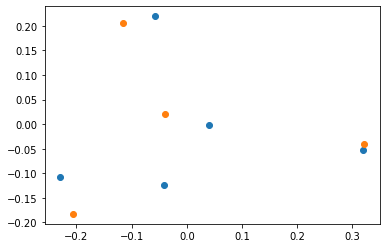

In [58]:
import matplotlib.pyplot as plt
plt.scatter([row_coords[:, 0]], [row_coords[:, 1]])
plt.scatter([col_coords[0, :]], [col_coords[1, :]])

In [62]:
(s[:2]**2).sum() / (s**2).sum()

0.9678438213061936